**Question 1**

<u>Description de l'algorithme du gradient stochastique appliqué à la minimisation du risque empirique</u>   

Le risque empirique correspond à la fonction $R_n: \mathbf{R}^d \rightarrow \mathbf{R} $ définit par:
<center>
$R_n(w)=\dfrac{1}{n}\sum\limits_{i=1}^n(y_i-^twx_i)^2$
</center>
L'objectif est ici de minimiser $R_n$ par l'algorithme du gradient stochastique.
De plus, en notant $Q_i=(y_i-^twx_i)^2$, on a:
<center>
$\nabla Q_i(w)=-2x_i(y_i-^twx_i)$
</center>
On note aussi $(\epsilon_k)_k=(\dfrac{1}{k})_k$.  

De plus, ici l'ensemble d'entraînement est de taille fini donc on peut considérer la distribution uniforme sur cet ensemble:
<center>  $dP(z)=\dfrac{1}{N}\sum_\limits{i=1}^N \delta(z-z_i)$</center>
L'algorithme du gradient stochastique est donc le suivant:


*   On choisit un point $w_0=0$ et la suite de pas $(\epsilon_k)_k=(\dfrac{1}{k})_k$
*   Pour k=0:N-1 
  * On tire aléatoirement avec remise $z_k$ au sein de l'échantillon d'entraînement (cf loi de probabilité)
  *Calcul de $Q_k(w_k)=-2x_k(y_k-^twx_k)$ 
  * On itère sur $w$ en calculant $w_{k+1}=w_{k}-\epsilon_k Q_k(w_k)$

    fin

Ainsi, on a simplement adapté l'algorithme du gradient stochastique à notre problème particulier.

On aurait par ailleurs pu choisir une suite $(\epsilon_k)$ potentiellement meilleure $(\dfrac{1}{k^{\alpha}})$ où $\alpha\in ]\dfrac{1}{2},1[$ comme on l'a vu en cours par exemple , toutefois la suite choisit convient.

Passons à l'implémentation:




In [ ]:
##Import des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
##Question 1
##Algorithme du gradient stochastique

def stochastic_gradient(xobs, yobs, w0, n):
  p=len(yobs)
  w=w0
  for k in range(1,n+1):
    i=np.random.randint(p)
    xi=xobs[i]
    yi=yobs[i]
    #On calcule le grandient pour la fonction de l'échantillon i tirée aléatoirement
    gradi=-2*xi*(yi-xi*w)
    w=w-(1/k)*gradi

  return w

**Question 2**

In [ ]:
##Question 2
def generate_random_sample(n):
  x=list()
  y=list()
  ##On génère un vecteur normal à l'hyperplan de séparation
  w=np.random.uniform(-1,1,size=2)
  print(w)
  for i in range(n):
    xi=np.random.uniform(-1,1,size=2)
    x+=[xi]
    if np.dot(xi,w)>0:
      yi=1
    else:
      yi=-1
    y+=[yi]
  x=np.array(x)
  y=np.array(y)
  return x,y,w

[0.01156894 0.91633618]


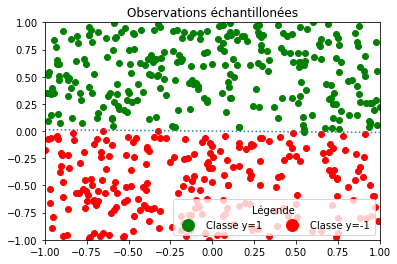

In [ ]:
#On peut tracer un aperçu de l'échantillon obtenu

xech,yech,wech = generate_random_sample(500)

#On sépare les échantillons associés à la classe y=1 de ceux associés à la classe y=-1
##
xech1=xech[yech>0]

xech2=xech[yech<0]
##

figure = plt.figure()
plt.subplot(1, 1, 1)

#On affiche les deux types d'échantillons, en vert (y=1) et en rouge (y=-1)
##
g1=plt.scatter(xech1[:,0],xech1[:,1], c='green')
g2=plt.scatter(xech2[:,0],xech2[:,1], c='red')
##

#On affiche l'hyperplan de séparation exacte
##
sx=np.linspace(-1,1,500)
sy=-(wech[0]/wech[1])*sx

g3=plt.plot(sx,sy,linestyle="dotted")
##

#Ajout de la légende
plt.legend([g1, g2], ['Classe y=1', 'Classe y=-1'],
              loc = 'lower right', ncol = 2, scatterpoints = 1,
              frameon = True, markerscale = 2, title = 'Légende',
              borderpad = 0.5, labelspacing = 0.5)
#Limites de la figure
plt.xlim([-1, 1])
plt.ylim([-1, 1])

#Titre
plt.title("Observations échantillonées")

plt.show()

**Question 3**

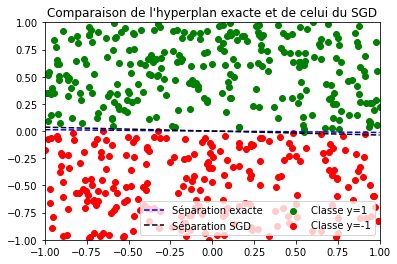

La valeur de w réel est:
  [0.01156894 0.91633618]
La valeur de w obtenue par algorithme du gradient stochastique est:
  [0.05308955 1.47215947]
La distance euclidienne entre les deux valeurs est:
 0.5573719549795011


In [ ]:
##Question 3
wstoc=stochastic_gradient(xech,yech,0,500)

figure = plt.figure()
plt.subplot(1, 1, 1)

#On affiche les deux types d'échantillons, en vert (y=1) et en rouge (y=-1)
##
g1=plt.scatter(xech1[:,0],xech1[:,1], c='green', label="Classe y=1")
g2=plt.scatter(xech2[:,0],xech2[:,1], c='red', label="Classe y=-1")
##

#On affiche l'hyperplan de séparation exacte
##
sx=np.linspace(-1,1,500)
sy=-(wech[0]/wech[1])*sx

g3=plt.plot(sx,sy,linestyle="dashed", c="blue", label="Séparation exacte")
##

#On affiche l'hyperplan de séparation approchée par SGD
##
systoc=-(wstoc[0]/wstoc[1])*sx

g4=plt.plot(sx,systoc,linestyle="dashed", c="black", label="Séparation SGD")
##

#Ajout de la légende
plt.legend(ncol=2)

#Limites de la figure
plt.xlim([-1, 1])
plt.ylim([-1, 1])

#Titre
plt.title("Comparaison de l'hyperplan exacte et de celui du SGD")

plt.show()

print("La valeur de w réel est:\n ", wech)

print("La valeur de w obtenue par algorithme du gradient stochastique est:\n ", wstoc)


print("La distance euclidienne entre les deux valeurs est:\n", np.linalg.norm(wstoc-wech))

Aussi, nous avons affiché ci-dessus la valeur obtenue par l'algorithme du gradient stochastique, la valeur est assez proche de la valeur réelle. De plus, on peut voir que la séparation obtenue est quasimment similaire à la séparation réelle, hormis pour quelques points.

**Question 4**

Text(0.5, 1.0, 'Histogramme du bruit gaussien')

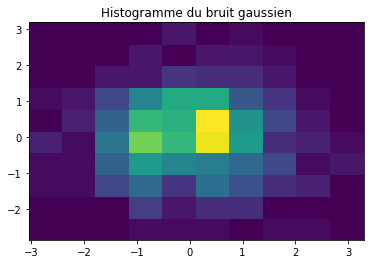

In [ ]:
##Question 4
##On simule donc un bruit gaussien
p=len(xech)
mean = [0, 0]
cov = [[1, 0], [0, 1]]
noise=np.random.multivariate_normal(mean, cov, p)

##On peut observer la distribution gaussienne du bruit
plt.hist2d(noise[:,0],noise[:,1])
plt.title("Histogramme du bruit gaussien")


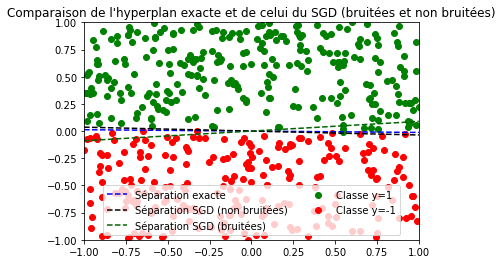

La valeur de w réel est:  [0.01156894 0.91633618]
La valeur de w obtenue par algorithme du gradient stochastique est:
  [0.05308955 1.47215947]
La valeur de w obtenue par algorithme du gradient stochastique sur les données bruitées est:
  [-0.03788837  0.42618612]


In [ ]:
#Ajout du bruit gaussien additif aux observations
xnoise=xech+noise 
#SGD sur les observations bruitées
wstocnoise=stochastic_gradient(xnoise,yech,0,500)


figure = plt.figure()
plt.subplot(1, 1, 1)

#On affiche les deux types d'échantillons, en vert (y=1) et en rouge (y=-1)
##
g1=plt.scatter(xech1[:,0],xech1[:,1], c='green', label="Classe y=1")
g2=plt.scatter(xech2[:,0],xech2[:,1], c='red', label="Classe y=-1")
##

#On affiche l'hyperplan de séparation exacte
##
sx=np.linspace(-1,1,500)
sy=-(wech[0]/wech[1])*sx

g3=plt.plot(sx,sy,linestyle="dashed", c="blue", label="Séparation exacte")
##

#On affiche l'hyperplan de séparation approchée par SGD
##
systoc=-(wstoc[0]/wstoc[1])*sx

g4=plt.plot(sx,systoc,linestyle="dashed", c="black", label="Séparation SGD (non bruitées)")
##

##On affiche l'hyperplan obtenue par SGD sur les données bruitées
systocnoise=-(wstocnoise[0]/wstocnoise[1])*sx

g5=plt.plot(sx,systocnoise,linestyle="dashed", c="darkgreen", label="Séparation SGD (bruitées)")

#Ajout de la légende
plt.legend(ncol=2)

#Limites de la figure
plt.xlim([-1, 1])
plt.ylim([-1, 1])

#Titre
plt.title("Comparaison de l'hyperplan exacte et de celui du SGD (bruitées et non bruitées)")

plt.show()

print("La valeur de w réel est: ", wech)

print("La valeur de w obtenue par algorithme du gradient stochastique est:\n ", wstoc)

print("La valeur de w obtenue par algorithme du gradient stochastique sur les données bruitées est:\n ", wstocnoise)

Les résultats obtenus après application de l'algorithme du gradient stochastique sur les données bruitées sont moins bons que ceux obtenus à la question précédente. En effet, le vecteur w estimé sur les données bruitées est plus éloigné que celui estimé sur les données non bruitées. De plus, la séparation obtenu sur la figure précédente nous confirme cela.

Toutefois la séparation obtenue sur les données bruitées reste correcte, en effet on peut voir que seulement quelque points sont mal classifiés.

**Question 5**

In [ ]:
##Question 5
##Import des données
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


datax=data['data']
datay=data['target']
datay[datay==0]=-1

wcancer=stochastic_gradient(datax,datay,0,50)

score=0
for i in range( len(datay)):
  if np.sign(np.dot(wcancer,datax[i]))==np.sign(datay[i]):
    score+=1

print("L'exactitude de classification obtenue sur le set d'entrainement est:\n ", score/len(datay))


L'exactitude de classification obtenue sur le set d'entrainement est:
  0.6274165202108963


Lorsque l'on augmente le nombre d'itérations, le vecteur $w$ obtenue diverge.